## 1. Introduction

*A major investment must be made. Lisbon is the chosen city. A major hotel chain is expanding its’ operation and the Portuguese capital is the city to go. With the data science project developed, we expect to choose the best location for this new building, considering not only the location of the competitors but, also, the location for all the major attractions – mainly restaurants and bars.*

## 2. Data

### 2.1. Which data am I using?

*Our core location is Saldanha, Lisbon. This is the business center for Lisbon, and the target customer is the executive one. This represent clients with business accounts, higher incomes and major plafond to spend.*

*For the project, we will be addressing information from Foursquare. What are we interested in?
Firstly, we want to know where the competitor hotels are located. With this, we pretend to be as far as possible from all of them.*

*Also, we want to know where the main attractions are located. With it, we want to be as close as possible for most of them.*

### 2.2. Importing libraries

In [1]:
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

### 2.2. Foursquare credentials

In [2]:
CLIENT_ID = 'XKPGOFHMMFH4H0JRZNSIBDALOFJGGDZFVN0DCEUFEBKPDGWT' # your Foursquare ID
CLIENT_SECRET = 'YFSSRMDZHVGJLBBHMDQ3Y3DV12PUTVJ5IVGSA3QYZKJPSGHD' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 750
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XKPGOFHMMFH4H0JRZNSIBDALOFJGGDZFVN0DCEUFEBKPDGWT
CLIENT_SECRET:YFSSRMDZHVGJLBBHMDQ3Y3DV12PUTVJ5IVGSA3QYZKJPSGHD


### 2.3. Definition on main location
*As presented, I am focusing on the business perspective of hotel usage. So, I've chosen the business center of Lisbon.*

In [3]:
address = 'Saldanha, Lisbon'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("Downtown Lisbon - Lat:", latitude, " - Long:", longitude)

Downtown Lisbon - Lat: 38.7351614  - Long: -9.1439375


### 2.4. Searching for hotels and main attractions
*It is important to search for my future competitors. Where are these hotels located?
Also, I am looking for the major attractions for our business clients. Life is more than meetings and work, so these clients would love to spend some free time in the prime city locations.*

In [4]:
search_hotel = 'hotel'
search_attr = ''

radius = 5000
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_hotel, radius, LIMIT)
url_attr = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_attr, radius, LIMIT)

In [5]:
results_hotel = requests.get(url_hotel).json()
results_attr = requests.get(url_attr).json()
#results_hotel

### 2.5. Transform our results in two dataframes - hotels and attractions.

In [6]:
# assign relevant part of JSON to venues
venues_hotel = results_hotel['response']['venues']
venues_attr = results_attr['response']['venues']

# tranform venues into a dataframe and merging both data
dataframe_hotel = json_normalize(venues_hotel)
dataframe_attract = json_normalize(venues_attr)
dataframe_attract

C:\Users\eeu242\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
C:\Users\eeu242\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood,venuePage.id
0,4f564e88e4b005c33bb4f6b2,A Padaria Portuguesa,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",v-1597393191,False,"Av. Duque d'Ávila, 24",38.735221,-9.144108,"[{'label': 'display', 'lat': 38.73522119467544...",16,1000-298,PT,Lisboa,Lisboa,Portugal,"[Av. Duque d'Ávila, 24, 1000-298 Lisboa, Portu...",NaN,NaN,NaN
1,4b7e615ff964a520d7ea2fe3,"Metro Saldanha [AM,VM]","[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",v-1597393191,False,Pç. Duque de Saldanha,38.734727,-9.145141,"[{'label': 'display', 'lat': 38.73472666944288...",115,NaN,PT,Lisboa,Lisboa,Portugal,"[Pç. Duque de Saldanha, Lisboa, Portugal]",NaN,NaN,NaN
2,4f0584ee722e1ef4e32bb6cf,AHRESP - Associacao da Hotelaria Restauracao e...,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1597393191,False,NaN,38.735146,-9.144002,"[{'label': 'display', 'lat': 38.73514589666297...",5,NaN,PT,Lisboa,Lisboa,Portugal,"[Lisboa, Portugal]",NaN,NaN,NaN
3,4f2bd3cfe4b0c642e520acc9,Cafetaria Gávea,"[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",v-1597393191,False,Av. Duque de Avila,38.734972,-9.144007,"[{'label': 'display', 'lat': 38.73497150677004...",21,1000,PT,Lisboa,Lisboa,Portugal,"[Av. Duque de Avila, 1000 Lisboa, Portugal]",NaN,NaN,NaN
4,4e0b2988d22dbfe2dd79ce0b,Italy,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1597393191,False,"Av. Duque de Ávila, 26B",38.735187,-9.144159,"[{'label': 'display', 'lat': 38.73518651734883...",19,1000-141,PT,Lisboa,Lisboa,Portugal,"[Av. Duque de Ávila, 26B, 1000-141 Lisboa, Por...",NaN,NaN,NaN
5,59bfe0aeee628b65b35dde0b,Açai Natura,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1597393191,False,"C. C. Atrium Saldanha, Lj 12",38.732994,-9.144759,"[{'label': 'display', 'lat': 38.732994, 'lng':...",251,1050-094,PT,Lisboa,Lisboa,Portugal,"[C. C. Atrium Saldanha, Lj 12 (Praça Duque de ...","Praça Duque de Saldanha, 1",NaN,NaN
6,4b0588a1f964a520ced022e3,Pastelaria Versailles,"[{'id': '5744ccdfe4b0c0459246b4e2', 'name': 'P...",v-1597393191,False,"Av. da República, 15A",38.735444,-9.145507,"[{'label': 'display', 'lat': 38.73544385341053...",139,1050-185,PT,Lisboa,Lisboa,Portugal,"[Av. da República, 15A, 1050-185 Lisboa, Portu...",NaN,NaN,NaN
7,5c4f638d86f4cc0039019692,Fitness Park,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",v-1597393191,False,Av. Defensores de Chaves Nr 23,38.734569,-9.143383,"[{'label': 'display', 'lat': 38.734569, 'lng':...",81,1000-139,PT,Lisboa,Lisboa,Portugal,"[Av. Defensores de Chaves Nr 23, 1000-139 Lisb...",NaN,NaN,NaN
8,4e019a0588776240d3f57c54,Arco do Cego,"[{'id': '4c38df4de52ce0d596b336e1', 'name': 'P...",v-1597393191,False,NaN,38.735251,-9.143278,"[{'label': 'display', 'lat': 38.73525100479083...",58,NaN,PT,Lisboa,Lisboa,Portugal,"[Lisboa, Portugal]",NaN,NaN,NaN
9,51adb7d5498ec1ceeed94026,Ahresp,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1597393191,False,NaN,38.735360,-9.143949,"[{'label': 'display', 'lat': 38.73536, 'lng': ...",22,NaN,PT,NaN,NaN,Portugal,[Portugal],NaN,NaN,NaN


### 2.6. Filter the categories and clean the data

I am filtering for some specific categories: 
* Arts & Crafts Store
* Asian Restaurant
* Bakery
* Bar
* Bistro
* Boutique
* Building
* Café
* Casino
* Deli / Bodega
* Indian Restaurant
* Italian restaurant
* Music Venue
* Office
* Portuguese Restaurant
* Restaurant
* Spa
* Sushi Restaurant

In [7]:
# keep only columns that include venue name, and anything that is associated with location
filtered_hotel_columns = ['name', 'categories'] + [col for col in dataframe_hotel.columns if col.startswith('location.')] + ['id']
filtered_attr_columns = ['name', 'categories'] + [col for col in dataframe_attract.columns if col.startswith('location.')] + ['id']

dataframe_hotels_filtered = dataframe_hotel.loc[:, filtered_hotel_columns]
dataframe_attr_filtered = dataframe_attract.loc[:, filtered_attr_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# filter the category for each row
dataframe_hotels_filtered['categories'] = dataframe_hotels_filtered.apply(get_category_type, axis=1)
dataframe_attr_filtered['categories'] = dataframe_attr_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_hotels_filtered.columns = [column.split('.')[-1] for column in dataframe_hotels_filtered.columns]
dataframe_attr_filtered.columns = [column.split('.')[-1] for column in dataframe_attr_filtered.columns]

#dataframe_filtered
hotels_df=dataframe_hotels_filtered[['name','categories','distance','lat','lng','id']]
attr_df=dataframe_attr_filtered[['name','categories','distance','lat','lng','id']]

attr_df = attr_df[attr_df['categories'].isin(['Sushi Restaurant','Café', 'Bar', 'Deli / Bodega','Arts & Crafts Store','Building','Portuguese Restaurant','Cafe','Casino','Asian Restaurant','Office','Bakery','Bistro','Boutique','Spa','Casino','Boutique','Indian Restaurant', 'Restaurant','Music Venue','Italian restaurant'])]

print("There are {} hotels in Lisbon".format(hotels_df.shape[0]))
print("There are {} attractions in Lisbon".format(attr_df.shape[0]))
attr_df

There are 50 hotels in Lisbon
There are 45 attractions in Lisbon


,name,categories,distance,lat,lng,id
0,A Padaria Portuguesa,Bakery,16,38.735221,-9.144108,4f564e88e4b005c33bb4f6b2
2,AHRESP - Associacao da Hotelaria Restauracao e...,Office,5,38.735146,-9.144002,4f0584ee722e1ef4e32bb6cf
9,Ahresp,Office,22,38.735360,-9.143949,51adb7d5498ec1ceeed94026
10,IPSOS Apeme,Office,26,38.735274,-9.144200,4ea5baa061af76b39decfce5
12,Galeto,Portuguese Restaurant,125,38.735672,-9.145226,4b0588a4f964a520d5d122e3
16,Eclaire,Boutique,31,38.735261,-9.144278,4fe336f6e4b0a812e9fa7dfc
18,Cozinha à Brás,Portuguese Restaurant,91,38.734507,-9.144572,58c0007b1174206f0ed289e5
24,eFuturo - Formação e Recrutamento,Building,104,38.735247,-9.145132,518b73e4498e7ebebef9b29a
25,Clube Militar Naval,Building,74,38.734769,-9.143240,4d306b6010e9b1f7a4e0baf1
30,Pastelaria Sequeira,Bakery,133,38.735152,-9.145478,4b51ec44f964a520805b27e3


### 2.7. How far from center are the venues?

In [8]:
attr_df[['name','distance','id']]

,name,distance,id
0,A Padaria Portuguesa,16,4f564e88e4b005c33bb4f6b2
2,AHRESP - Associacao da Hotelaria Restauracao e...,5,4f0584ee722e1ef4e32bb6cf
9,Ahresp,22,51adb7d5498ec1ceeed94026
10,IPSOS Apeme,26,4ea5baa061af76b39decfce5
12,Galeto,125,4b0588a4f964a520d5d122e3
16,Eclaire,31,4fe336f6e4b0a812e9fa7dfc
18,Cozinha à Brás,91,58c0007b1174206f0ed289e5
24,eFuturo - Formação e Recrutamento,104,518b73e4498e7ebebef9b29a
25,Clube Militar Naval,74,4d306b6010e9b1f7a4e0baf1
30,Pastelaria Sequeira,133,4b51ec44f964a520805b27e3


### 2.8. Location of hotels (blue) and attractions (green)

In [9]:
hotels_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Kanyakumari

# add a red circle marker to represent the core location of kanyakumari
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Downtown Lisbon',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hotels_map)

# add the competitor hotels as blue circle markers
for lat, lng, label in zip(hotels_df.lat, hotels_df.lng, hotels_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map)
    
# add the close attractions as green circle markers
for lat, lng, label in zip(attr_df.lat, attr_df.lng, attr_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(hotels_map)

# display map
hotels_map

## 3. Methodology

Here, we want to look at the data gathered. How far are the hotel from the city center? How close are the main attractions to this center?

### 3.1. How close are the competitor hotels from the business center?

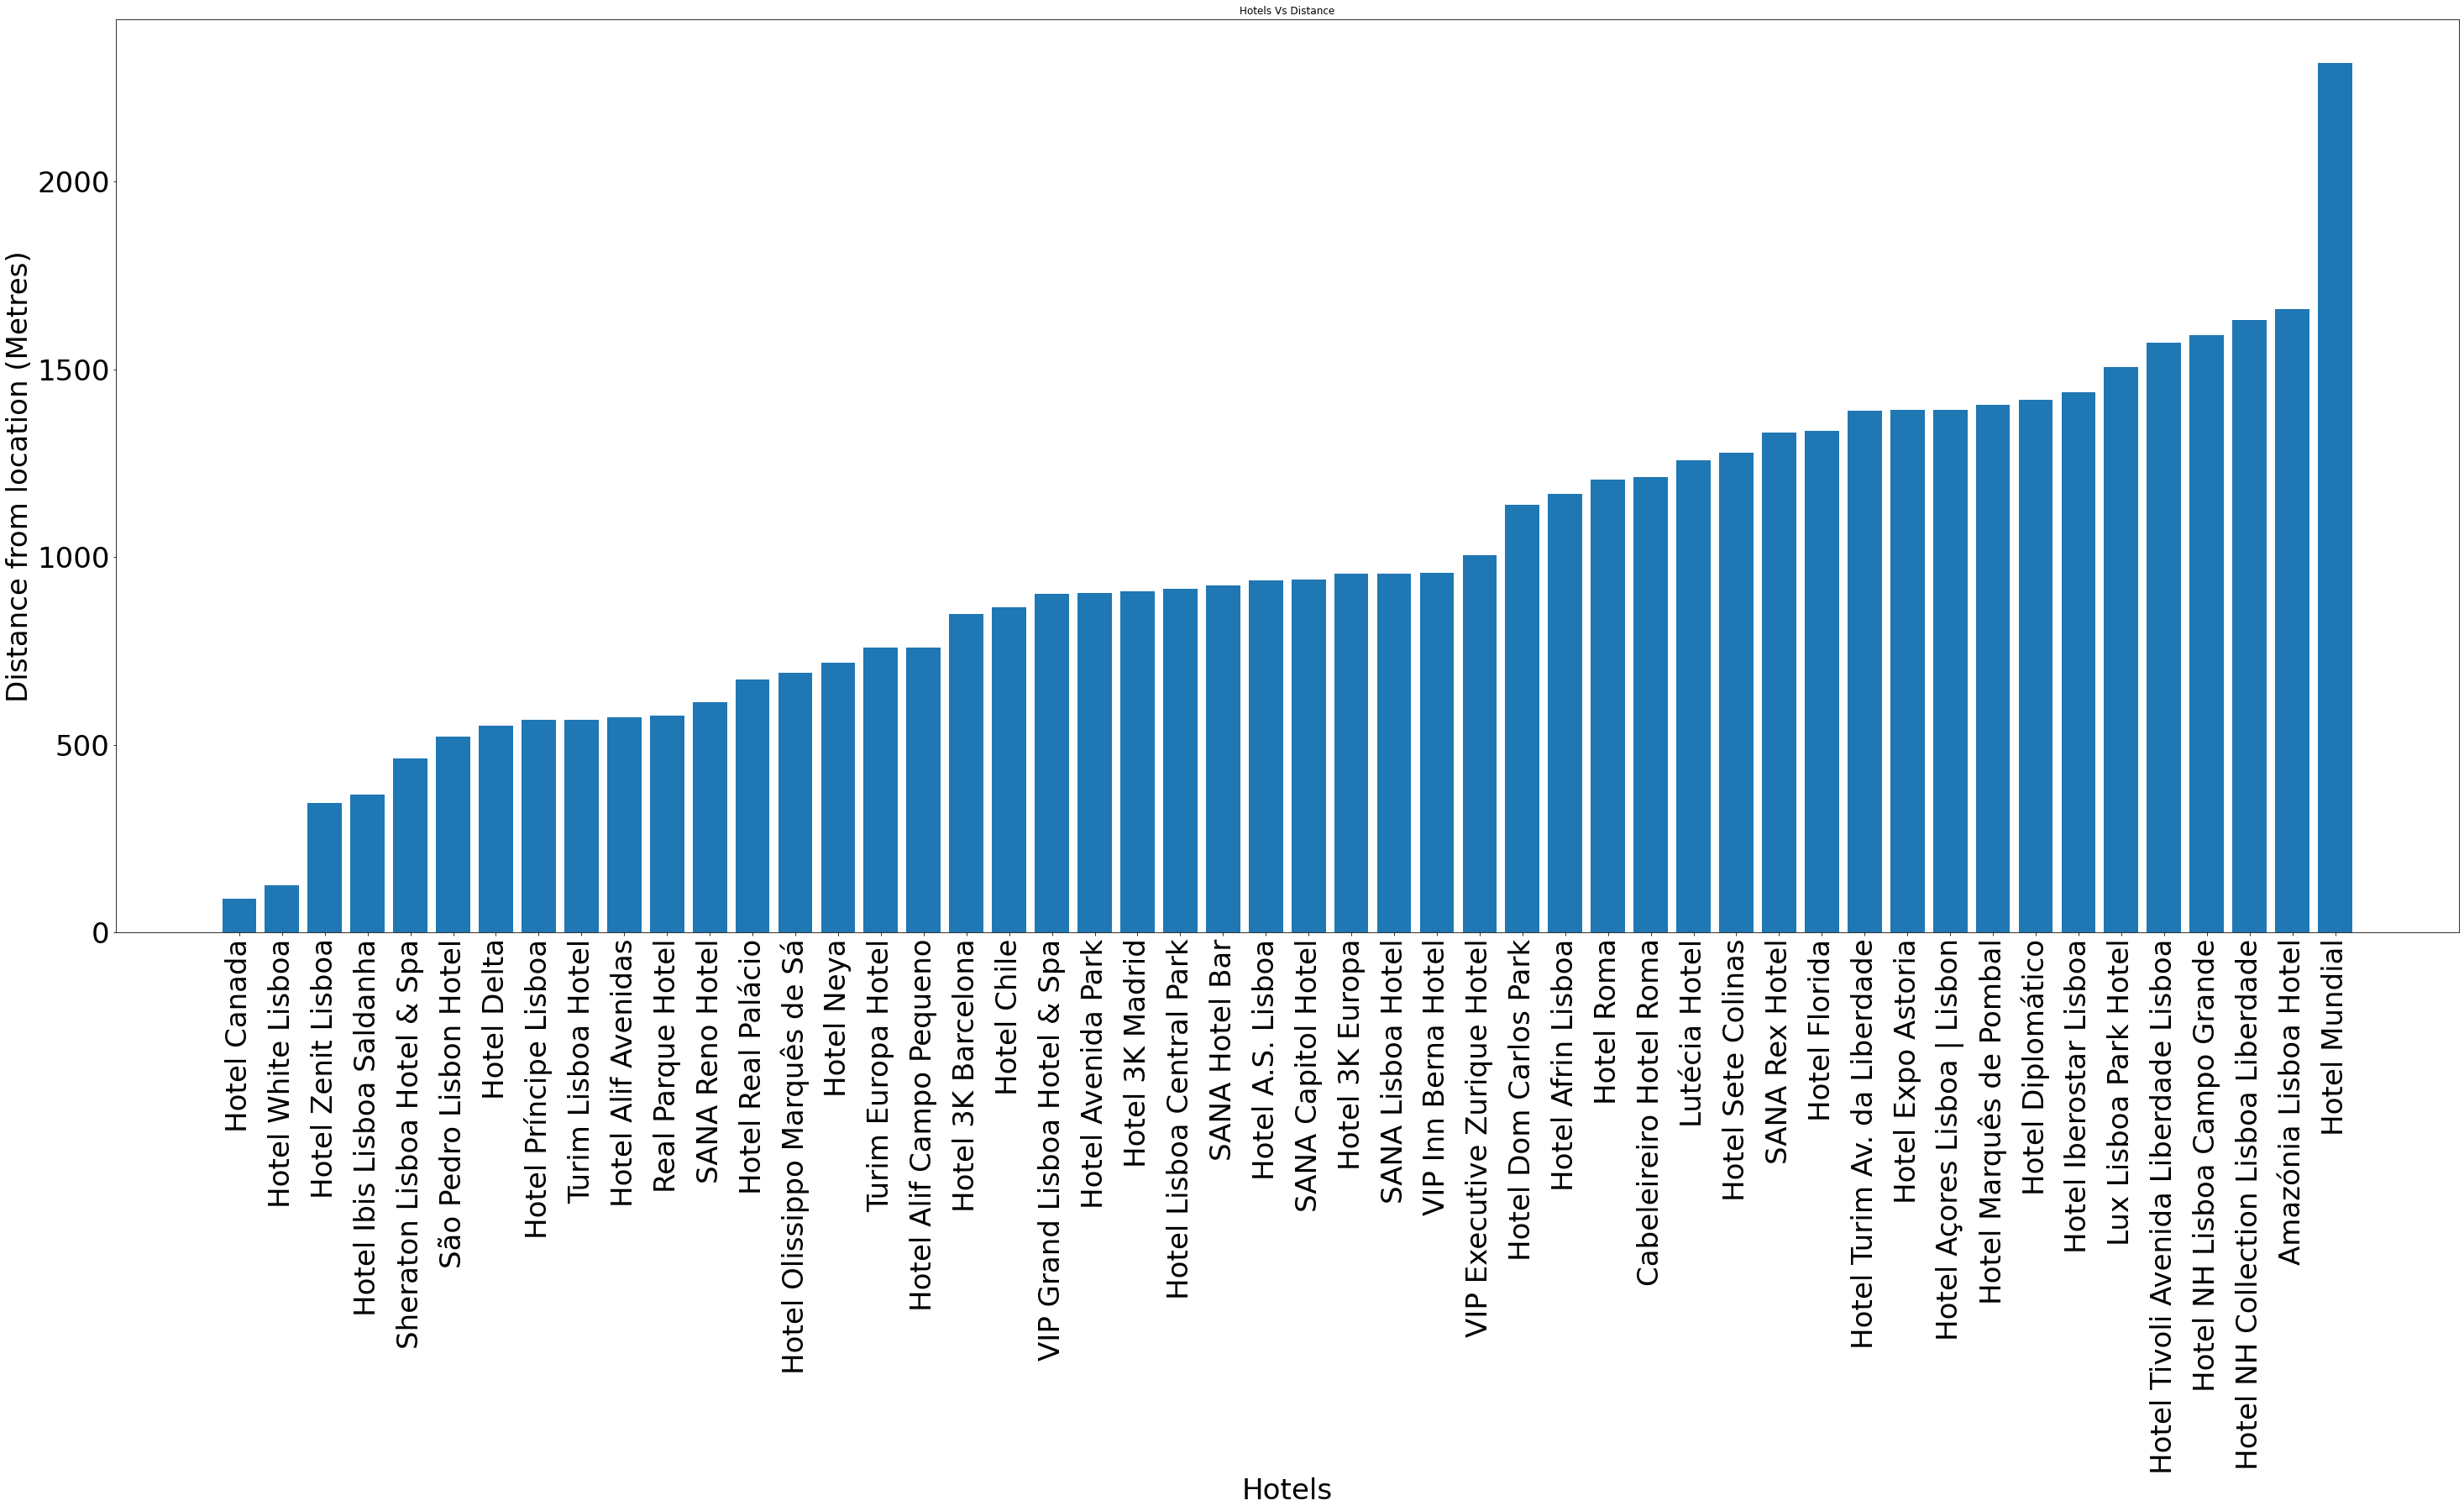

Average distance between hotels and core location is 992 metres


In [10]:
distance_hotel_df=hotels_df[['name','categories','distance','lat','lng']].sort_values('distance')

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_hotel_df.name))
    plt.figure(figsize=(50,20))
    plt.bar(distance_hotel_df.name, distance_hotel_df.distance)
    plt.xlabel('Hotels',fontsize=34)
    plt.ylabel('Distance from location (Metres)',fontsize=34)
    plt.xticks(distance_hotel_df.name,rotation=90,fontsize=34)
    plt.yticks(fontsize=34)
    plt.title('Hotels Vs Distance')
    plt.show()
plot_bar_x()

print("Average distance between hotels and core location is {} metres".format(int(sum(hotels_df['distance'])/hotels_df.shape[0])))

### 3.1.1. It's important to understand how many hotels can we find at some distance ranges...

In [11]:
distance_rest_df=attr_df[['name','categories','distance','lat','lng']].sort_values('distance')
distance_rest_df_grouped = distance_rest_df[['name','categories','distance']].sort_values('distance')
distance_rest_df_grouped['dst_grp'] = np.where(distance_rest_df_grouped.distance <= 30, '0-30', 
                                        np.where(distance_rest_df_grouped.distance <= 60, '30-60', 
                                        np.where(distance_rest_df_grouped.distance <= 100, '60-100',
                                        np.where(distance_rest_df_grouped.distance >= 100, '100-250',
                                        '+250'))))
distance_rest_df_grouped = distance_rest_df_grouped.groupby(['dst_grp']).size()
distance_rest_df_grouped.head()

dst_grp
0-30        4
100-250    26
30-60       7
60-100      8
dtype: int64

### 3.2. And how close are the attraction venues to the business centers?

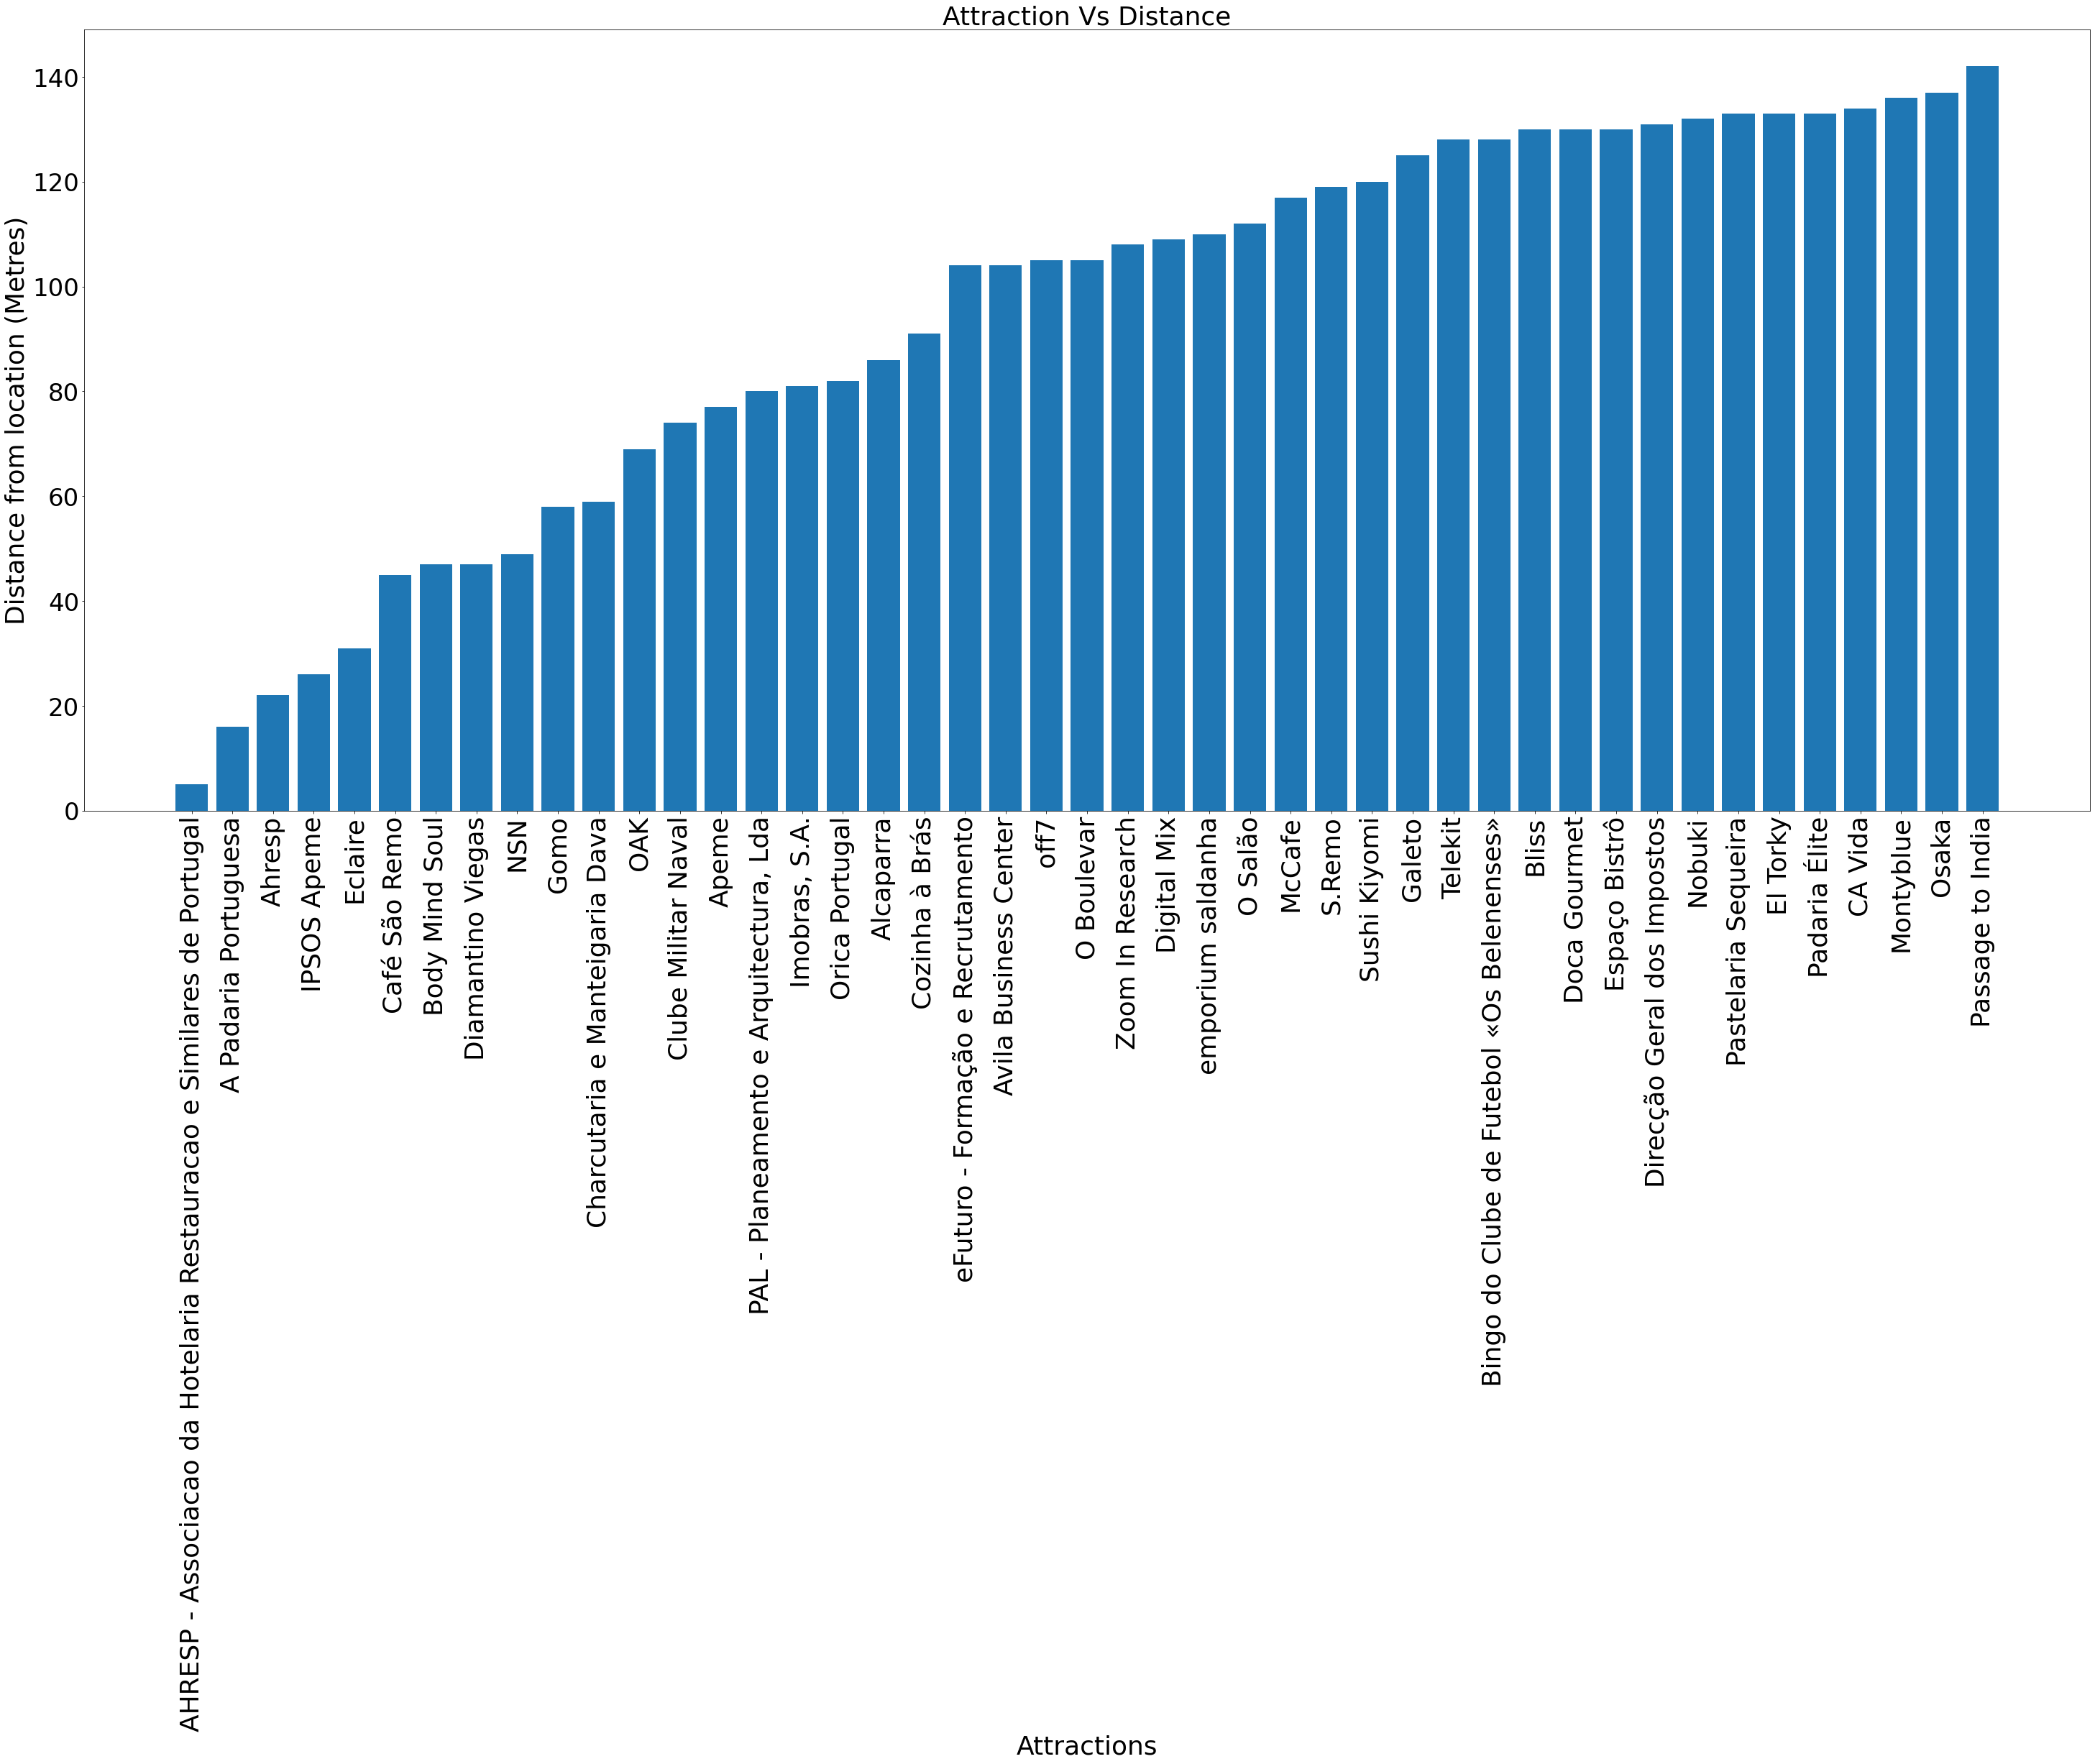

Average distance between attractions and core location is 94 metres


In [12]:
distance_rest_df=attr_df[['name','categories','distance','lat','lng']].sort_values('distance')
distance_rest_df_clr = distance_rest_df[distance_rest_df.distance < 250]

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_rest_df_clr.name))
    plt.figure(figsize=(50,20)) 
    plt.bar(distance_rest_df_clr.name, distance_rest_df_clr.distance)
    plt.xlabel('Attractions',fontsize = 36)
    plt.ylabel('Distance from location (Metres)',fontsize = 36)
    plt.xticks(distance_rest_df_clr.name,rotation=90,fontsize = 36)
    plt.yticks(fontsize=34)
    plt.title('Attraction Vs Distance',fontsize = 36)
    plt.show()
plot_bar_x()

print("Average distance between attractions and core location is {} metres".format(int(sum(distance_rest_df['distance'])/distance_rest_df.shape[0])))

### 3.3. What type of attractions are most common around the center?

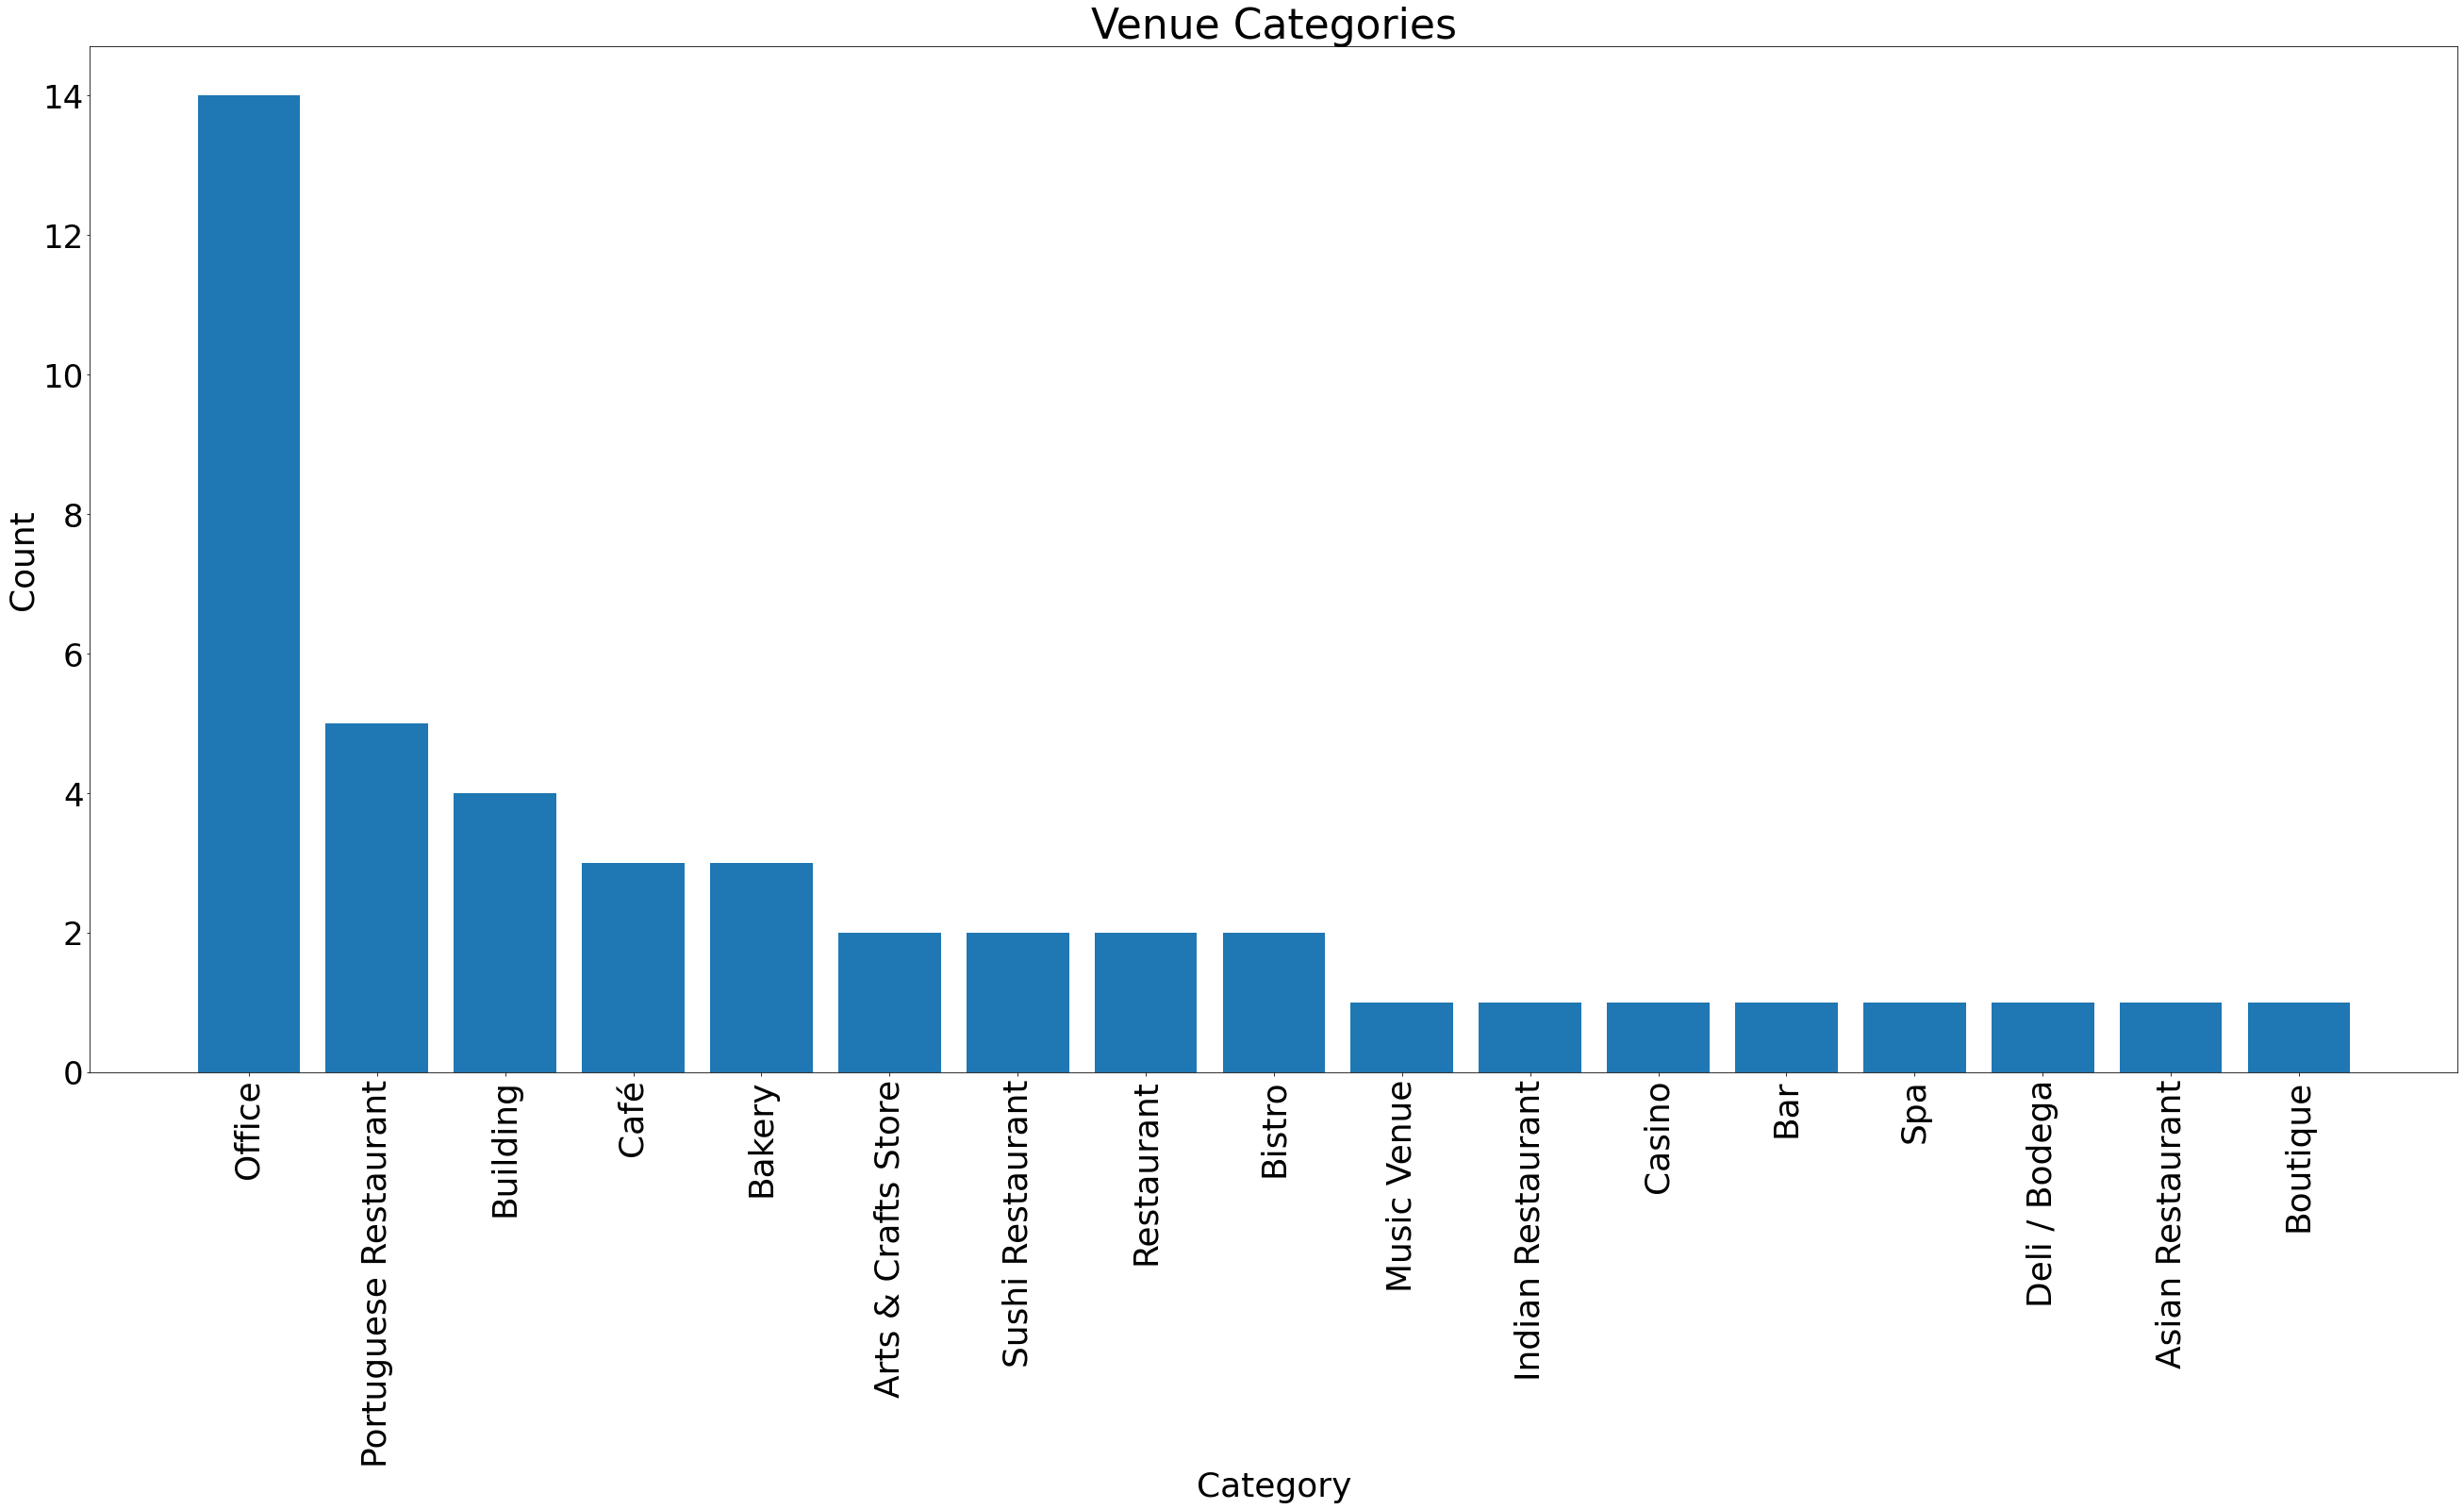

In [13]:
freq_venue=distance_rest_df['categories'].value_counts()
freq_venue=pd.DataFrame(freq_venue).reset_index()
freq_venue.columns=['Category','Count']
freq_venue

def plot_bar_categ():
    # this is for plotting purpose
    index = np.arange(len(freq_venue.Category))
    plt.figure(figsize=(45,20)) 
    plt.bar(freq_venue.Category, freq_venue.Count)
    plt.xlabel('Category', fontsize = 36)
    plt.ylabel('Count', fontsize = 36)
    plt.xticks(freq_venue.Category,rotation=90, fontsize = 36)
    plt.yticks(fontsize=34)
    plt.title('Venue Categories', fontsize = 44)
    plt.show()
plot_bar_categ()

### 3.4. Major takeaways

It is important here to draw some conclusions from our data analysis:
* We have been able to find 50 hotels (at least) within the 5km radius from the business center. However, on average, they are 750 meters far from the center;
* We have also been able to find 32 attractions (after filtering for the relevant attraction categories). But, they are, on average, 87 meters away from the center;
* Considering the attractions, we have to point out that the most common attractions are offices (relevant for business travelers), portuguese restaurantes (what else...?), cafes, bakerys and relevant buildings. We have a bunch of those a few meters away from the center.

**The potential is proven.**

### 3.5. Clustering

In [14]:
# one hot encoding
neighbor_onehot = pd.get_dummies(distance_rest_df[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighbor_onehot['name'] = distance_rest_df['name'] 

# move neighborhood column to the first column
fixed_columns = [neighbor_onehot.columns[-1]] + list(neighbor_onehot.columns[:-1])
neighbor_onehot = neighbor_onehot[fixed_columns]

neighbor_onehot.head()


,name,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Bistro,Boutique,Building,Café,Casino,Deli / Bodega,Indian Restaurant,Music Venue,Office,Portuguese Restaurant,Restaurant,Spa,Sushi Restaurant
2,AHRESP - Associacao da Hotelaria Restauracao e...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
0,A Padaria Portuguesa,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Ahresp,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10,IPSOS Apeme,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16,Eclaire,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [15]:
neighbor_onehot.shape
neighbor_grouped = neighbor_onehot.groupby('name').mean().reset_index()

In [16]:
# Top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['name'] = neighbor_grouped['name']

In [17]:
# Clustering

# set number of clusters
kclusters = 3

neighbor_grouped_clustering = neighbor_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighbor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Clustersss', kmeans.labels_)

neighbor_merged = distance_rest_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
neighbor_merged = neighbor_merged.join(neighborhoods_venues_sorted.set_index('name'), on='name')

kmeans

KMeans(n_clusters=3, random_state=0)

### 3.6. Center of clusters
**Where should we locate our hotel?**

In [18]:
fin=neighbor_merged.groupby(['Clustersss']).mean()

lati=sum(fin.lat)/len(fin.lat)
longi=sum(fin.lng)/len(fin.lng)

#Taking midpoint of top ten closest hotel
venues_lan=sum(distance_rest_df.lat)/len(distance_rest_df.lat)
venues_lng=sum(distance_rest_df.lng)/len(distance_rest_df.lng)

final_latitude=(lati+venues_lan)/2
final_longitude=(longi+venues_lng)/2

print("Final location (Green Dot in our below given map) of our brand new hotel:{},{}".format(final_latitude,final_longitude))

Final location (Green Dot in our below given map) of our brand new hotel:38.73501193371531,-9.144028671193514


### 3.7. Let's map our location!

In [19]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=17)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.features.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='green',
    popup='My hotel',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clustersss']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

### 3.8. Let's check out hotel location and compare to the attractions location

In [20]:
my_hotel_vs_all = folium.Map(location=[latitude, longitude], zoom_start=16) 

# add a red circle marker to represent the my hotel location
folium.features.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='green',
    popup='My Hotel',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(my_hotel_vs_all)


# add a red circle marker to represent the core location of Lisbon business center
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Lisbon',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(my_hotel_vs_all)

# add the mais venues as blue circle markers
for lat, lng, label in zip(distance_rest_df.lat, distance_rest_df.lng, distance_rest_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(my_hotel_vs_all)
    
my_hotel_vs_all

## 4. Results

* We have been able to pin point the perfect location for our hotel: 38.73501, -9.14402.
* We after all should place almost at the exact city business center, since the main attractions are quite close to it.
* In the above Folium map, we may encounter the business city center - red - as the hotel proposed location - green - and all the attractions marked in blue.

## 5. Discussion

In this project, I've considered a specific niche potential customer. I was not looking for general tourist, but targeting the business visitors to the city. Because of this, when considering attractions, it was important to select the specific ones to this kind of travelers - offices and buildings, but also cafes, restaurants and formal venues. It's important to state that, targeting a different kind of customer, we would probably get different results and hotel proposed location.

Also, it would be relevant to argue that the limited group of results when 'acquiring' attractions from Foursquare API may condition the clustering results and, with it, the expected result for the proposed hotel location.

Finally, in a real world approach to this problem, many other factors and conditionings would have to be considered. Let's face an example: we cannot place the hotel wherever we want... Is there an existing building on the proposed location? Is it possible to build something new there?
It would be an amazing and never ending discussion...

## 6. Conclusion
As stated, in this simplistic approach to this problem, we have been able to find the perfect location for our hotel. 
It's a real world application to our problem and has proven the data science application to this same real world problem.
Our mission is completed.